In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Equilibrium volume V0 = 76.66396605238562
Equilibrium energy E0 = -23.602760760108133
Bulk modulus B0 = 0.02931868402494348
Bulk modulus derivative B0_prime = 3.755231601770925
Optimized lattice constant a0 = 6.7434750972593065 a.u.


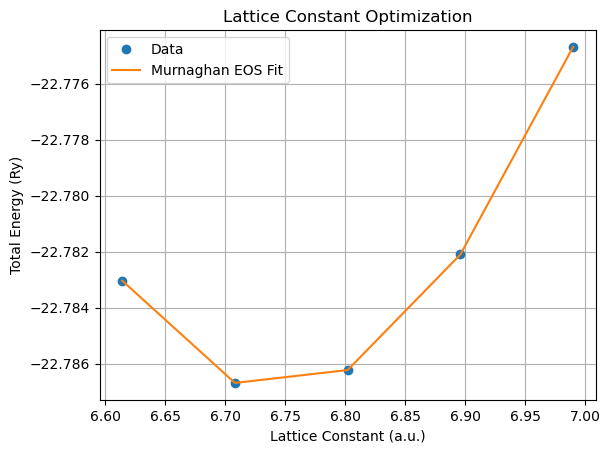

In [2]:
# Define the Murnaghan equation of state
def murnaghan(V, E0, V0, B0, B0_prime):
    return E0 + (B0 * V / B0_prime) * (((V0 / V)**B0_prime) / (B0_prime - 1) + 1)

# Lattice constants in atomic units (a.u.)
lattice_constants = np.array([6.614, 6.708, 6.802, 6.896, 6.990])

# Calculate the corresponding volumes (V = a^3 / 4)
volumes = (lattice_constants ** 3) / 4

# Corresponding total energies in Rydbergs (Ry)
total_energies = np.array([-22.78303493, -22.78668751, -22.78622902, -22.78209962, -22.77468487])

# Initial guess for the fit parameters [E0, V0, B0, B0_prime]
initial_guess = [-22.7, volumes[len(volumes) // 2], 0.5, 4.0]

# Perform the curve fitting using scipy's curve_fit
params, covariance = curve_fit(murnaghan, volumes, total_energies, p0=initial_guess)

# Extract fitted parameters
E0, V0, B0, B0_prime = params
print(f"Equilibrium volume V0 = {V0}")
print(f"Equilibrium energy E0 = {E0}")
print(f"Bulk modulus B0 = {B0}")
print(f"Bulk modulus derivative B0_prime = {B0_prime}")

# Calculate the optimized lattice constant (a0) from the equilibrium volume (V0)
a0 = (4 * V0)**(1/3)
print(f"Optimized lattice constant a0 = {a0} a.u.")

# Plot the fitted Murnaghan equation and the data points
fitted_energies = murnaghan(volumes, E0, V0, B0, B0_prime)

plt.plot(lattice_constants, total_energies, 'o', label='Data')
plt.plot((4 * volumes)**(1/3), fitted_energies, '-', label='Murnaghan EOS Fit')
plt.xlabel('Lattice Constant (a.u.)')
plt.ylabel('Total Energy (Ry)')
plt.title('Lattice Constant Optimization')
plt.legend()
plt.grid(True)
plt.show()